# Resnet50 Learned Features

# Regression and Classification

## LGBM Regression

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Imputer
from sklearn.model_selection import cross_val_score, cross_val_predict
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [1]:
import lightgbm as lgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor

X=pd.read_csv('train_X.csv')
X=X.iloc[:,1:]


Y=pd.read_csv('train_Y.csv')
#Y=Y[['ABCC5', 'PGM5', 'COX6C', 'MALAT1', 'KRT5', 'CPB1', 'TTLL12']]
#Y=Y.values.reshape(3798,7)

Y=Y[['TTLL12']]
Y=Y.values.reshape(3798,)

#Standard_scaler_y = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
#Standard_scaler_y.fit(Y)
#Standard_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
#Y = Standard_scaler.fit_transform(Y) 
Y = pd.DataFrame(data=Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

Standard_scaler_x = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
X_train = Standard_scaler_x.fit_transform(X_train)
X_test = Standard_scaler_x.transform(X_test) 

Standard_scaler_y = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
y_train = Standard_scaler_y.fit_transform(y_train)
y_test = Standard_scaler_y.transform(y_test)

gbm = lgb.LGBMRegressor()#MultiOutputRegressor
'''gbm.fit(trainX, trainY,
        eval_set=[(testX, testY)],
        eval_metric='l1',
        early_stopping_rounds=1000)
y_pred = gbm.predict(testX, num_iteration=gbm.best_iteration_)'''

gbm.fit(X_train, y_train)
y_pred=gbm.predict(X_test)

C:\Users\Onkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [2]:
import sklearn
import math
rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)

RMSE =  0.07026101379661809


In [7]:
y_pred.shape

(570,)

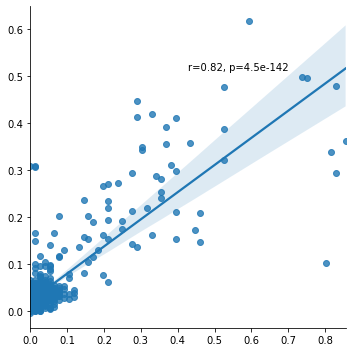

In [8]:
from matplotlib import pyplot as plt
import scipy as sp
Prediction=pd.DataFrame()
#Prediction['y_test']=y_test[:,1]
#Prediction['y_pred']=y_pred[:,1]
Prediction['y_test']=y_test.reshape(570,)
Prediction['y_pred']=y_pred
Prediction.head()
import seaborn as sns
g=sns.lmplot(x="y_test", y="y_pred", data=Prediction)
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(Prediction['y_test'], Prediction['y_pred'])
    ax = plt.gca()
    ax.text(.5, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

In [9]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.03
Mean squared error = 0.0
Median absolute error = 0.02
Explain variance score = 0.66
R2 score = 0.66


## Test

In [13]:
test_X = pd.read_csv('test_X.csv')
test_X=test_X.iloc[:,1:]
test_X=Standard_scaler_x.transform(test_X)
test_Y=pd.read_csv('test_Y.csv')
#test_Y=test_Y[['ABCC5', 'PGM5', 'COX6C', 'MALAT1', 'KRT5', 'CPB1', 'TTLL12']]
#test_Y=test_Y.values.reshape(3987,7)
test_Y = test_Y[['TTLL12']]
test_Y=Standard_scaler_y.transform(test_Y)
test_Y=pd.DataFrame(data=test_Y)
y_pred_test=gbm.predict(test_X)

In [15]:
#y_pred_test = y_pred_test/2
Prediction_test=pd.DataFrame()
#Prediction_test['test_Y']=test_Y.iloc[:,5].values.reshape(3987,)
#Prediction_test['y_pred_test']=y_pred_test[:,5]
Prediction_test['test_Y']=test_Y.values.reshape(3987,)
Prediction_test['y_pred_test']=y_pred_test
Prediction_test.head()

,test_Y,y_pred_test
0,0.013158,0.041401
1,0.000000,0.034122
2,0.039474,0.040353
3,0.473684,0.135371
4,0.026316,0.026410


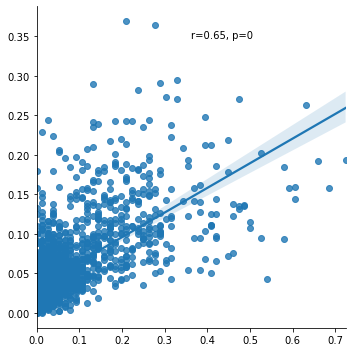

In [16]:
import seaborn as sns
g=sns.lmplot(x="test_Y", y="y_pred_test", data=Prediction_test)
from matplotlib import pyplot as plt
import scipy as sp
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(Prediction_test['test_Y'], Prediction_test['y_pred_test'])
    ax = plt.gca()
    ax.text(.5, .9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g.map_dataframe(annotate)
plt.show()

In [ ]:
print(np.min(test_Y))
print(np.min(y_pred_test))
print(np.max(test_Y))
print(np.max(y_pred_test))
print(np.mean(test_Y))
print(np.mean(y_pred_test))

In [ ]:
print(np.min(y_test))
print(np.min(y_pred))
print(np.max(y_test))
print(np.max(y_pred))
print(np.mean(y_test))
print(np.mean(y_pred))

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(test_Y, y_pred_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_Y, y_pred_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_Y, y_pred_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_Y, y_pred_test), 2)) 
print("R2 score =", round(sm.r2_score(test_Y, y_pred_test), 2))

## Scale from 0-3

## Visualisation

In [ ]:
y_pred_test1 =y_pred_test[:,0]
y_pred_test1
y_pred_test2 =y_pred_test[:,1]
y_pred_test2
y_pred_test3 =y_pred_test[:,2]
y_pred_test3
y_pred_test4 =y_pred_test[:,3]
y_pred_test4
y_pred_test5 =y_pred_test[:,4]
y_pred_test5
y_pred_test6 =y_pred_test[:,5]
y_pred_test6
y_pred_test7 =y_pred_test[:,6]
y_pred_test7

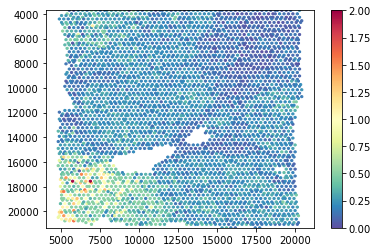

In [20]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt
Gene_exp=pd.read_csv('pivot_test_Y.csv')
Gene_exp.head()
x = Gene_exp['x'] 
y = Gene_exp['y'] 
y_pred_test_scaled = np.interp(y_pred_test, (y_pred_test.min(), y_pred_test.max()), (0, 2))
y_pred_test_scaled[(y_pred_test_scaled <= 0.8)&(y_pred_test_scaled >= 0.5)] =0.5
c = y_pred_test_scaled
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 
#INDIVIDUAL
#BUILDING REGRESSION ON REGRESSION

In [ ]:
Gene_exp=pd.read_csv('pivot_test_Y.csv')
Gene_exp.head()
from matplotlib import cm as cm
x = Gene_exp['x']
y = Gene_exp['y']
c = Gene_exp['TTLL12']
c = np.interp(c, (c.min(), c.max()), (0, 2))
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show()

# SHAP Model Interpretability

In [17]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train[0,:])

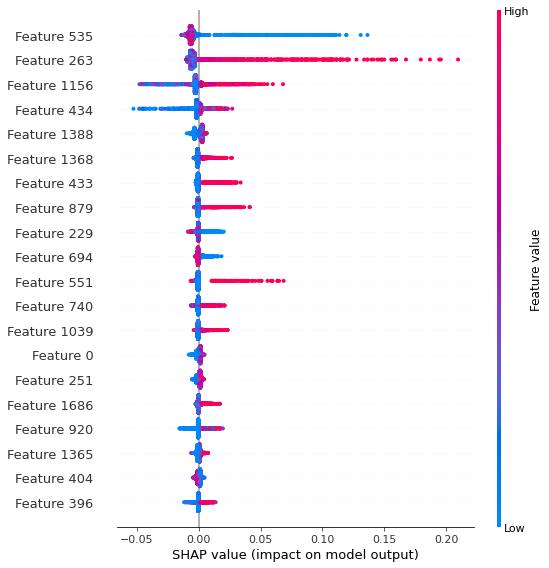

In [18]:
shap.summary_plot(shap_values, X_train)

# Latent Space Visualisation

# UMAP Non-Cancer vs Cancer - Resnet50 Features

In [21]:
import pandas as pd
train_X = pd.read_csv('train_X.csv')
#cluster_by_sno = pd.read_csv('Cluster_Img_trial.csv')
#Barcode_img_name = pd.read_csv('Barcode_img_name.csv')
cluster_by_barcode = pd.read_csv('D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/analysis/clustering/kmeans_2_clusters/clusters.csv')
Barcode = cluster_by_barcode['Barcode']
train_X['Barcode'] = Barcode
Latent_Space_data_visualisation = pd.merge(train_X, cluster_by_barcode, on= "Barcode", how="inner")
#Latent_Space_data_visualisation = pd.merge(Latent_Space_data_visualisation, cluster_by_sno, on= "Sno", how="inner")
label = Latent_Space_data_visualisation.loc[:,'Cluster'].values
resnet_features = Latent_Space_data_visualisation.iloc[:,1:2049].values
Latent_Space_data_visualisation.head()
#print(train_X.shape, cluster_by_barcode.shape)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2040,2041,2042,2043,2044,2045,2046,2047,Barcode,Cluster
0,0,0.073980,0.239105,0.129612,0.000000,0.063473,1.048708,0.097686,0.000000,0.152399,...,0.000000,0.073292,0.000000,0.026605,0.000000,0.026472,0.000000,0.455779,AAACAAGTATCTCCCA-1,2
1,1,0.074172,0.494710,0.102380,0.099047,0.099426,0.371493,0.049967,0.331193,0.013821,...,0.000000,0.000000,0.028401,0.000000,0.223520,0.000000,0.048670,0.165899,AAACACCAATAACTGC-1,1
2,2,0.089299,2.069227,0.000000,0.055518,1.733089,0.070358,0.000000,0.022521,0.092520,...,0.000000,0.000779,0.033841,0.021045,0.000000,0.149435,0.000000,1.415421,AAACAGAGCGACTCCT-1,2
3,3,0.891453,0.355217,0.182028,0.000000,1.747591,0.369688,0.014498,0.014586,0.213549,...,0.000025,0.018513,0.000000,0.799561,0.000000,0.278747,0.014505,1.680771,AAACAGGGTCTATATT-1,2
4,4,0.390899,0.775398,0.000800,0.000000,0.154438,0.075246,0.000000,0.005133,0.079296,...,0.000000,0.000000,0.000000,0.000000,0.094105,0.954665,0.034120,0.082681,AAACAGTGTTCCTGGG-1,1


<AxesSubplot:>

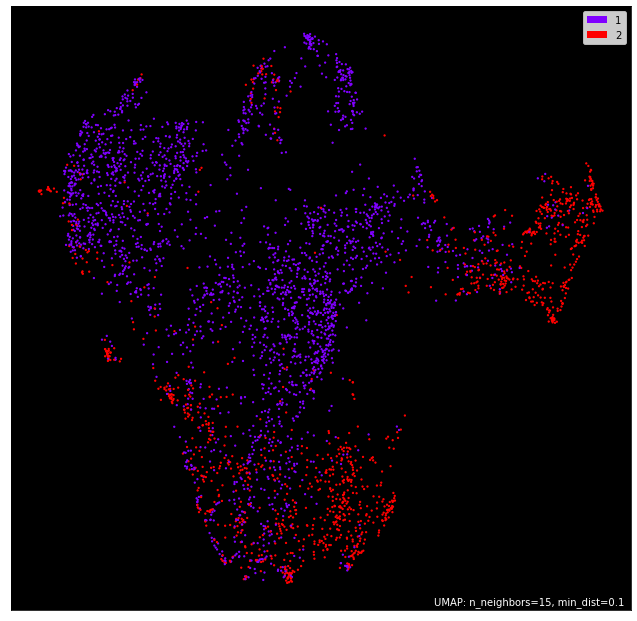

In [22]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd
import umap.plot
mapper = umap.UMAP().fit(resnet_features)
#p=umap.plot.interactive(mapper, labels=label, color_key_cmap='Paired', background='black', point_size=2)
#umap.plot.show(p)
umap.plot.points(mapper, labels=label, theme='fire', background='black')

# High vs Low Gene Expression Classification

## LGBM Classifier

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=pd.read_csv('train_X.csv')
X=X.iloc[:,1:]
Standard_scaler_x = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
Standard_scaler_x.fit(X)
Standard_scaler_x = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
X = Standard_scaler_x.fit_transform(X) 

Y=pd.read_csv('train_Y.csv')
Y=Y.iloc[:,2:3]
#Standard_scaler_y = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
#Standard_scaler_y.fit(Y)
Standard_scaler_y = preprocessing.MinMaxScaler(feature_range =(0, 1)) #StandardScaler()#
Y = Standard_scaler_y.fit_transform(Y) 
Y = pd.DataFrame(data=Y)
Y=Y.apply(lambda x: pd.qcut(x, 2,duplicates='drop',labels=False))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify=Y)

clf = lgb.LGBMClassifier(class_weight={0:0.55, 1:0.45})
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

C:\Users\Onkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Validation Set

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(truth, pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
classifier_report = classification_report(y_test, y_pred)
print(classifier_report)
multiclass_roc_score = multiclass_roc_auc_score(y_pred, y_test, average="weighted")
print("Binary_roc_score")
print(multiclass_roc_score)

Confusion matrix

 [[304  77]
 [ 49 330]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       381
           1       0.81      0.87      0.84       379

    accuracy                           0.83       760
   macro avg       0.84      0.83      0.83       760
weighted avg       0.84      0.83      0.83       760

Binary_roc_score
0.8360003062552638


## LIME Interpretability

In [17]:
import lime
import lime.lime_tabular
X=pd.read_csv('train_X.csv')
X.drop(['Unnamed: 0'],axis=1,inplace=True)
float_columns = []
for i in X.columns:
    if X[i].dtype == 'float' : 
        float_columns.append(i)
train_float_features = X[float_columns]
feature_names_float = list(train_float_features)

In [18]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
feature_names=feature_names_float,
class_names=['0','1'],
verbose=True)

In [21]:
exp = explainer.explain_instance(X_test[2], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True) 

Intercept 0.5353936972856144
Prediction_local [0.19480407]
Right: 0.005905978467645144


In [30]:
y_test.iloc[2:3,:]

,0
570,0


# Test Set Breast Cancer Section 2A

In [3]:
test_X = pd.read_csv('test_X.csv')
test_X=test_X.iloc[:,1:]
test_X=Standard_scaler_x.transform(test_X)

test_Y=pd.read_csv('test_Y.csv')
test_Y=test_Y.iloc[:,1:2]
test_Y=Standard_scaler_y.transform(test_Y)
test_Y=pd.DataFrame(data=test_Y)
test_Y=test_Y.apply(lambda x: pd.qcut(x, 2,duplicates='drop',labels=False))

y_pred_test=clf.predict(test_X)

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(truth, pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

cm = confusion_matrix(test_Y, y_pred_test)
print('Confusion matrix\n\n', cm)
classifier_report = classification_report(test_Y, y_pred_test)
print(classifier_report)
multiclass_roc_score = multiclass_roc_auc_score(test_Y, y_pred_test, average="weighted")
print("Binary_roc_score")
print(multiclass_roc_score)

Confusion matrix

 [[1117 1069]
 [ 273 1528]]
              precision    recall  f1-score   support

           0       0.80      0.51      0.62      2186
           1       0.59      0.85      0.69      1801

    accuracy                           0.66      3987
   macro avg       0.70      0.68      0.66      3987
weighted avg       0.71      0.66      0.66      3987

Binary_roc_score
0.6796982514034848


# Biomarker Tumor Spot Predictions

## LGBM Classifier

In [27]:
import pandas as pd
train_X = pd.read_csv('train_X.csv')
Gene_exp = pd.read_csv('train_Y.csv')
Biomarker = Gene_exp[['COX6C']]
Biomarker = pd.DataFrame(data=Biomarker)
#Biomarker=Biomarker.apply(lambda x: pd.qcut(x, 2,duplicates='drop',labels=False))
train_X['Biomarker'] = Biomarker
Cluster = pd.read_csv('Cluster_Img_trial.csv')
train_Y = pd.merge(Gene_exp, Cluster, on="Sno", how="inner")
train_Y.head()

,Unnamed: 0_x,Barcode,ABCC5,ADAM15,ADAR,ADIPOR1,AEBP1,ANXA2,ANXA6,APOC1,...,COX6C,CPB1.1,KRT5,MALAT1.1,CASP8,CASP10,MAD2L2,Sno,Unnamed: 0_y,Cluster
0,0,AAACAAGTATCTCCCA-1,2,0,4,1,9,2,2,18,...,35,2,0,51,2,0,1,2552img,2551,0
1,1,AAACACCAATAACTGC-1,31,12,29,11,12,7,9,21,...,211,7,0,32,1,1,1,2931img,2930,1
2,2,AAACAGAGCGACTCCT-1,0,0,0,1,4,1,1,1,...,25,1,0,43,0,0,1,0633img,632,0
3,3,AAACAGGGTCTATATT-1,0,2,7,3,5,4,3,18,...,55,5,0,47,1,0,2,2368img,2367,1
4,4,AAACAGTGTTCCTGGG-1,15,9,23,11,23,21,5,20,...,253,8,0,27,1,0,1,3694img,3693,1


In [28]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

train_X = train_X.iloc[:,-1].values.reshape(3798,1)
Y= train_Y.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(train_X, Y, test_size = 0.20, random_state = 0, stratify=Y)
clf = lgb.LGBMClassifier()#class_weight={0:0.55, 1:0.45}
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(truth, pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
classifier_report = classification_report(y_test, y_pred)
print(classifier_report)
multiclass_roc_score = multiclass_roc_auc_score(y_pred, y_test, average="weighted")
print("Binary_roc_score")
print(multiclass_roc_score)

Confusion matrix

 [[293 103]
 [ 43 321]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       396
           1       0.76      0.88      0.81       364

    accuracy                           0.81       760
   macro avg       0.81      0.81      0.81       760
weighted avg       0.82      0.81      0.81       760

Binary_roc_score
0.8145496406109614


## Test Set

In [30]:
import pandas as pd
barcode = pd.read_csv('Barcode_img_name_test.csv')
test_Y = pd.read_csv('test_Y.csv')
Cluster_test = pd.read_csv('Cluter_Img2.csv')
test_Y2 = pd.merge(test_Y, barcode, on='Barcode', how="inner")
Biomarker = test_Y2[['COX6C']]
Biomarker = pd.DataFrame(data=Biomarker)
#Biomarker=Biomarker.apply(lambda x: pd.qcut(x, 2,duplicates='drop',labels=False))
test_Y3 = pd.merge(test_Y2, Cluster_test, on="Sno", how="inner")
test_Y3['Cluster'] = test_Y3['Cluster'].replace({2:0})
#test_Y3.head()
y_pred_test=clf.predict(Biomarker)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(truth, pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

cm = confusion_matrix(test_Y3['Cluster'], y_pred_test)
print('Confusion matrix\n\n', cm)
classifier_report = classification_report(test_Y3['Cluster'], y_pred_test)
print(classifier_report)
multiclass_roc_score = multiclass_roc_auc_score(test_Y3['Cluster'], y_pred_test, average="weighted")
print("Binary_roc_score")
print(multiclass_roc_score)

Confusion matrix

 [[1293  327]
 [ 370 1997]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1620
           1       0.86      0.84      0.85      2367

    accuracy                           0.83      3987
   macro avg       0.82      0.82      0.82      3987
weighted avg       0.83      0.83      0.83      3987

Binary_roc_score
0.8209160681594141


# SHAP Model Interpretation

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


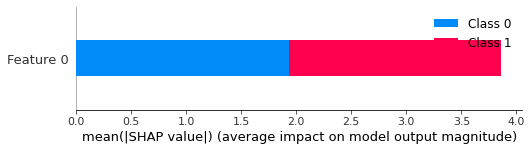

In [32]:
import shap
import numpy as np
shap.initjs()
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.dependence_plot(shap_values, X_train)
#shap.force_plot(explainer.expected_value[0], np.asarray(shap_values)[0,:])
shap.summary_plot(shap_values, X_train)

# LIME Tumor vs Non-Tumor

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras import regularizers
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [2]:
'''# Path to train and test directory
import os
dir_ = os.path.join('C:/Users/Onkar/UntitledFolder/Cluster_train')


train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)


train_generator = train_datagen.flow_from_directory(dir_,target_size=(290,290),
                                                   batch_size= 64,
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset = 'training')

valid_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size = (290,290),
                                                          batch_size = 64,
                                                          class_mode = 'categorical',
                                                          shuffle=False,
                                                          subset = 'validation')

dir1_ = os.path.join('C:/Users/Onkar/UntitledFolder/Cluster_test')

test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(dir1_,
                                                          target_size = (290,290),
                                                          batch_size = 64,
                                                          class_mode = 'categorical',
                                                          shuffle=False)



'''
df=pd.read_csv("CNN_dataframe_gene_expression_3.csv")
df_test=pd.read_csv("CNN_dataframe_gene_expression_test_3.csv")
df['Cluster'] = df['Cluster'].astype('str')
df_test['Cluster']= df_test['Cluster'].astype('str')
datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.2, featurewise_center=True,
            featurewise_std_normalization=False,
            rotation_range=90,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="Trainimg_breast_2_299", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32, subset="training")
valid_generator = datagen.flow_from_dataframe(dataframe=df, directory="Trainimg_breast_2_299", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32, subset="validation")
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test, directory="Trainimg_breast_test_299", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32)


Found 3039 validated image filenames belonging to 3 classes.
Found 759 validated image filenames belonging to 3 classes.
Found 3987 validated image filenames belonging to 3 classes.


In [3]:
'''
model = InceptionV3(include_top=False, input_shape=(290,290,3), weights = "imagenet")
flat1 = Flatten()(model.layers[-1].output)
dense = Dense(256, activation='relu')(flat1)
drop = Dropout(0.5)(dense)
output = Dense(2, activation='softmax')(drop)
model = Model(inputs=model.inputs, outputs=output)
'''
model = Sequential([
    
    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(290, 290, 3), kernel_regularizer=regularizers.l2(0.02)),
        Conv2D(16, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
    
    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        #BatchNormalization(),
    
    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        #BatchNormalization(),

    
    # Fourth convolution
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
    # Fifth Convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
        Flatten(),
    
    # Dense hidden layer
        Dense(64, activation='relu'),
        Dropout(0.5),
    
    # Output neuron. 
        Dense(3, activation='softmax') 
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator,validation_data=valid_generator,epochs=5)

C:\Users\Onkar\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
95/95 [==============================] - 239s 3s/step - loss: 1.1406 - accuracy: 0.4383 - val_loss: 1.1354 - val_accuracy: 0.3623
Epoch 2/5
82/95 [========================>.....] - ETA: 31s - loss: 1.0974 - accuracy: 0.4529

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_generator)

In [9]:
from skimage import io
from tensorflow.keras.preprocessing import image
import cv2
import glob
'''for img in glob.glob("C:/Users/Onkar/UntitledFolder/Cluster_train/cluster1/0120img.tif"):
    cv_img = cv2.imread(img)
img = image.img_to_array(cv_img)
img = img.reshape(-1,290,290,3)
#img = np.expand_dims(img, axis=0)'''
preds = model.predict(test_generator)
test_pred = np.argmax(preds, axis=1)
print(test_pred)
unique, counts = np.unique(test_pred, return_counts=True)
print(counts)

[1 1 1 ... 1 0 0]
[ 662 3325]


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(truth, pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

cm = confusion_matrix(df_test['Cluster'].astype('int64'), test_pred)
print('Confusion matrix\n\n', cm)
classifier_report = classification_report(df_test['Cluster'].astype('int64'), test_pred)
print(classifier_report)
multiclass_roc_score = multiclass_roc_auc_score(df_test['Cluster'].astype('int64'), test_pred, average="weighted")
print("Binary_roc_score")
print(multiclass_roc_score)
print("Log_loss")
logloss = log_loss(df_test['Cluster'].astype('int64'), preds)
print(logloss)

Confusion matrix

 [[ 322 1674]
 [ 340 1651]]
              precision    recall  f1-score   support

           0       0.49      0.16      0.24      1996
           1       0.50      0.83      0.62      1991

    accuracy                           0.49      3987
   macro avg       0.49      0.50      0.43      3987
weighted avg       0.49      0.49      0.43      3987

Binary_roc_score
0.4952770936146527
Log_loss
0.9479699472541465


In [11]:
from lime import lime_image
import cv2
img=cv2.imread('Cluster_train/cluster1/1799img.tif')
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img.astype('double'), model.predict)
from skimage.segmentation import mark_boundaries


  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


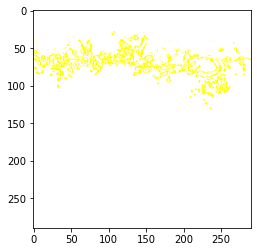

In [21]:
#explanation.top_labels[0:2]
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=100, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

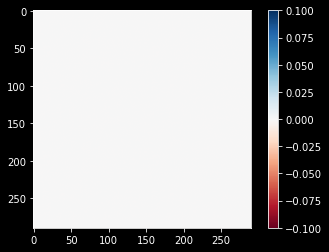

In [48]:
ind =  explanation.top_labels[1]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Eli5

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

model = model 

img = image.load_img('Cluster_train/cluster1/1799img.tif', target_size=(290,290))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#print(decode_predictions(predicted_vals[0,:]))
with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('max_pooling2d_15')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((16,16))
plt.matshow(heatmap)
plt.show()

In [47]:
import math
import eli5
tf.compat.v1.disable_eager_execution()
def plot_eli5_top_explanations(
    model: model, 
    image: np.array, 
    top_preds_count: int = 1
) -> None:
    
    image_columns = 3
    image_rows = math.ceil(top_preds_count / image_columns)
    
    with graph.as_default():
        preds = model.predict(image)
    top_preds_indexes = np.flip(np.argsort(preds))[0,:top_preds_count]
    top_preds_values = preds.take(top_preds_indexes)
    #top_preds_names = np.vectorize(lambda x: class_names[x])(top_preds_indexes)
    
    plt.style.use('dark_background')
    fig, axes = plt.subplots(image_rows, image_columns, figsize=(image_columns * 5, image_rows * 5))
    [ax.set_axis_off() for ax in axes.flat]
    
    for i, (index, value, ax) in \
        enumerate(zip(top_preds_indexes, top_preds_values, axes.flat)):
        class_grad_cam = eli5.show_prediction(model, image, targets=[int(index)])
        subplot_title = "{}. class: {} pred: {:.3f}".format(i + 1, name, value)
        ax.imshow(class_grad_cam)
        ax.set_title(subplot_title, pad=20)
    
    if fig_name:
        plt.savefig(fig_name)
    plt.show()
    
img1 = img.reshape(-1,290,290,3)
plot_eli5_top_explanations(model, img1, 1)

AttributeError: type object 'Graph' has no attribute 'as_default'

# LIME Gene Expression

In [14]:
from lime import lime_image
import cv2
img=cv2.imread('Cluster_test/cluster1/0001img.tif')
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img.astype('double'), model.predict)
#explanation.save_to_file('lime.html')

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


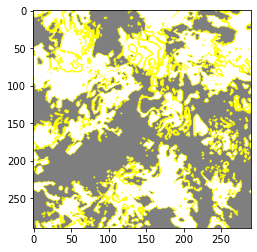

In [73]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=105, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

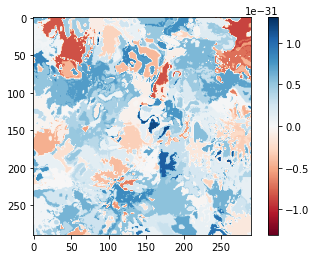

In [74]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Tumor vs Non-Tumor Interpretation

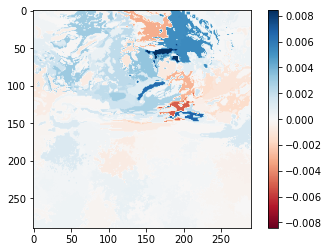

In [20]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# ROUGH

In [ ]:
'''Y=pd.read_csv('train_Y.csv')
Y=Y.iloc[:,2:3]
Y=pd.DataFrame(data=Y)
cut_series, cut_intervals = pd.cut(Y.ABCC5, bins=3, retbins=True) 
cut_intervals'''

In [ ]:
def countFreq(arr, n):  
    mp = {}  
    for i in range(n): 
        if arr[i] not in mp: 
            mp[arr[i]] = 0
        mp[arr[i]] += 1
    for i in range(n): 
        if (mp[arr[i]] != -1): 
            print(arr[i],mp[arr[i]]) 
        mp[arr[i]] = -1  
        
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn import preprocessing 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

min_max_scaler_x = preprocessing.StandardScaler()#MinMaxScaler(feature_range =(0, 1)) 
min_max_scaler_x.fit(X)

min_max_scaler = preprocessing.StandardScaler()#MinMaxScaler(feature_range =(0, 1)) 
X = min_max_scaler.fit_transform(X) 

le = LabelEncoder()
Y= le.fit_transform(y)

#strategy = {0:2500, 1:2500, 2:2500}
#oversample = SMOTE(sampling_strategy=strategy)
#X, Y = oversample.fit_resample(X, Y)

arr=Y
n = len(arr) 
countFreq(arr, n) 

In [ ]:
'''X11=X.reshape([3798,58800])
X11=pd.DataFrame(data=X11)
X11.head()
X11.to_csv('Img_arr.csv')'''

In [ ]:
#link=pd.read_csv('link_to_img_trial.csv')
#gene_matrix=pd.read_csv('gene_exp.csv')
#gene_matrix = gene_matrix[['bar_name','x','y']]
#gene_matrix=gene_matrix.drop_duplicates(subset ="bar_name", keep = 'first') 
Barcode_img_name = pd.merge(gene_matrix,link,on=['x','y'],how='inner')
Barcode_img_name = Barcode_img_name[['bar_name','Sno', 'x', 'y']]
Barcode_img_name.to_csv('Barcode_img_name.csv')
Barcode_img_name.head()
#gene_matrix.head()

In [ ]:
from scipy import stats
import seaborn as sns
#y1=y[y>0]
#normalized_data = stats.boxcox(y1)
fig, ax=plt.subplots(1,2)
sns.distplot(y1, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(y, ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
from scipy import stats
import seaborn as sns
normalized_data=y[y<10]
fig, ax=plt.subplots(1,2)
sns.distplot(y, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
df=pd.read_csv('gene_exp_breast_can2.csv')
df=df.drop(['Unnamed: 0','X1','X2','bar_name'],axis=1)
df2=pd.DataFrame()
df2=df.groupby(['x','y','UMI_Count']).agg('gene_name').apply(lambda x:" ".join(list(set(x)))).reset_index()
df3=pd.read_csv('link_to_img_breast_can2.csv')
df7=df3
df7.head()

In [ ]:
df11 = pd.merge(df, df7, on=['x','y'], how='inner')
df11=df11.drop(columns=['Unnamed: 0'])
df11.head()

In [ ]:
from numpy import load
df12=pd.pivot_table(df11, values='UMI_Count', index=['Sno'],columns=['gene_name'], aggfunc=np.sum)
df13=df12.fillna(0)
intersect_col_genes= load('intersect_col_genes.npy',allow_pickle=True)
df13=df13[intersect_col_genes]
df13.head()
df13.to_csv('Pivot_gene_breast_can2.csv')

In [ ]:
train_Y=pd.read_csv('train_Y.csv')
pivot=pd.read_csv('link_to_img_trial.csv')
pivot=pivot[['x','y','Sno']]
pivot_trial_Y=pd.merge(train_Y,pivot,on=['Sno'],how="inner")
#pivot.head()
pivot_trial_Y.head()
pivot_trial_Y.to_csv('pivot_trial_Y.csv')

In [ ]:
Gene_exp_test = pd.read_csv('gene_exp_breast_can2.csv')
Gene_exp_test = Gene_exp_test[['x','y','bar_name']]
Gene_exp_test.drop_duplicates(subset=['bar_name'],inplace=True)
pivot=pd.read_csv('link_to_img_breast_can2.csv')
pivot=pivot[['x','y','Sno']]
Barcode_img_name_test=pd.merge(pivot,Gene_exp_test,on=["x","y"],how="inner")
Barcode_img_name_test.to_csv('Barcode_img_name_test.csv')

In [ ]:
test_Y=pd.read_csv('test_Y.csv')
pivot=pd.read_csv('Barcode_img_name_test.csv')
pivot=pivot[['x','y','Sno','Barcode']]
pivot_test_Y=pd.merge(test_Y,pivot,on=['Barcode'],how="inner")
#pivot.head()
pivot_test_Y.head()
pivot_test_Y.to_csv('pivot_test_Y.csv')

## Import Data

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
plt.style.use("ggplot")
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing 
from numpy import log
df14=pd.read_csv('Pivot_gene_trial.csv')
#df14.reset_index(level=0, inplace=True)
Sno=df14['Sno']
df14.drop(['Sno'],axis=1,inplace=True)
#df14=log(df14+1)
min_max_scaler = preprocessing.StandardScaler()#MinMaxScaler(feature_range =(0, 1))
min_max_scaler_y = preprocessing.StandardScaler()#MinMaxScaler(feature_range =(0, 1)) 
min_max_scaler_y.fit(df14)
df14 = min_max_scaler.fit_transform(df14) 
df14=pd.DataFrame(data=df14)
df14=df14.apply(lambda x: pd.qcut(x, 3,duplicates='drop',labels=False))
df14=df14.astype('str')
df14=df14.replace(['0', '1', '2'], ['A','B', 'C'])
#df14=df14.iloc[:,382:383]
df14.head()
#CNN_train_reg = pd.DataFrame()
#CNN_train_reg['Gene'] = df14['MALAT1.1']
#CNN_train_reg['Sno'] = Sno

In [ ]:
'''import pandas as pd
#CNN_train_reg= pd.read_csv('CNN_train_reg.csv')
def append_ext(fn):
    return fn+".tif"
CNN_train_reg["Sno"]=CNN_train_reg["Sno"].apply(append_ext)
CNN_train_reg.to_csv('CNN_train_reg.csv')'''

In [ ]:
y=df14.iloc[:,382:383]
y

In [ ]:
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(df3):
    # create a set of all known tags
    labels = set()
    for i in range(len(df3)):
        # convert spaced separated tags into an array of tags
        gene_name = df3['gene_name'][i].split(' ')
        # add tags to the set of known labels
        labels.update(gene_name)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map
# create a mapping of filename to tags
def create_file_mapping(df3):
    mapping = dict()
    for i in range(len(df3)):
        name, gene_name = df3['Sno'][i], df3['gene_name'][i]
        mapping[name] = gene_name.split(' ')
    return mapping
# create a one hot encoding for one list of tags
def one_hot_encode(gene_name, mapping):
    # create empty vector
    encoding = zeros(len(mapping), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in gene_name:
        encoding[mapping[tag]] = 1
    return encoding
def load_dataset(path, file_mapping, tag_mapping):
    photos, targets = list(), list()
    # enumerate files in the directory
    for filename in listdir(folder):
        # load image
        photo = load_img(path + filename, target_size=(140,140))
        # convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        # get tags
        gene_name = file_mapping[filename[:-4]]
        # one hot encode tags
        target = one_hot_encode(gene_name, tag_mapping)
        # store
        photos.append(photo)
        targets.append(target)
    X = asarray(photos, dtype='uint8')
    return X

In [ ]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('Gene_list_df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast2/'
X= load_dataset(folder, file_mapping, tag_mapping)
X=X.reshape([3798,58800]) #(3407,140,140,3) --> reshape --> (3407,58800), #Umap->DR #CNN/CapsNet
#y=df13.iloc[:,0:5].values
#y=y.astype(int)
print(X.shape)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.subplot(1,2,1)
sns.distplot(test_Y)
plt.subplot(1,2,2)
sns.distplot(y_pred_test)

In [ ]:
import seaborn as sns
plt.subplot(1,2,1)
sns.distplot(y_test)
plt.subplot(1,2,2)
sns.distplot(y_pred)

## Visualisation

In [ ]:
Gene_exp=pd.read_csv('pivot_test_Y.csv')
Gene_exp.head()

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from matplotlib import cm as cm
x = Gene_exp['x']
y = Gene_exp['y']
c = Gene_exp['ABCC5']
plt.hexbin(y,x, C=c, cmap=cm.plasma, gridsize=50,bins='log')
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

In [ ]:
Gene_exp=pd.read_csv('pivot_test_Y.csv')
Gene_exp.head()
from matplotlib import cm as cm
x = Gene_exp['x']
y = Gene_exp['y']
c = test_Y
plt.hexbin(y,x, C=c, cmap=cm.viridis, gridsize=110,bins='log')
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

In [ ]:
from matplotlib import cm as cm
x1 = Gene_exp['x']
y1 = Gene_exp['y']
c1 = y_pred_test
plt.hexbin(y1,x1, C=c1, cmap=cm.viridis, gridsize=110,bins='log')
plt.ylim(max(x1), min(x1)) 
plt.colorbar()
plt.show()

## Test Set

In [ ]:
'''CNN_test = pd.DataFrame()
CNN_test['Gene'] = df14['MALAT1.1']
CNN_test['Sno'] = Sno
CNN_test.to_csv('CNN_test.csv')'''
from sklearn import preprocessing 
df14=pd.read_csv('Pivot_gene_breast_can2.csv')
#df14.reset_index(level=0, inplace=True)
Sno=df14['Sno']
df14.drop(['Sno'],axis=1,inplace=True)
#df14=log(df14+1)
#df14=min_max_scaler_y.transform(df14)
df14=min_max_scaler_y.fit_transform(df14)
df14=pd.DataFrame(data=df14)
df14=df14.apply(lambda x: pd.qcut(x, 3,duplicates='drop',labels=False))
df14=df14.astype('str')
df14=df14.replace(['0', '1', '2'], ['A', 'B', 'C'])
df14.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
y1=df14.iloc[:,382:383]
le = LabelEncoder()
Y1= le.fit_transform(y1)
Y1

In [ ]:
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(df3):
    # create a set of all known tags
    labels = set()
    for i in range(len(df3)):
        # convert spaced separated tags into an array of tags
        gene_name = df3['gene_name'][i].split(' ')
        # add tags to the set of known labels
        labels.update(gene_name)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map
# create a mapping of filename to tags
def create_file_mapping(df3):
    mapping = dict()
    for i in range(len(df3)):
        name, gene_name = df3['Sno'][i], df3['gene_name'][i]
        mapping[name] = gene_name.split(' ')
    return mapping
# create a one hot encoding for one list of tags
def one_hot_encode(gene_name, mapping):
    # create empty vector
    encoding = zeros(len(mapping), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in gene_name:
        encoding[mapping[tag]] = 1
    return encoding
def load_dataset(path, file_mapping, tag_mapping):
    photos, targets = list(), list()
    # enumerate files in the directory
    for filename in listdir(folder):
        # load image
        photo = load_img(path + filename, target_size=(140,140))
        # convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        # get tags
        gene_name = file_mapping[filename[:-4]]
        # one hot encode tags
        target = one_hot_encode(gene_name, tag_mapping)
        # store
        photos.append(photo)
        targets.append(target)
    X = asarray(photos, dtype='uint8')
    return X

from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('Gene_list_Breast_Can2.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast_test/'
X1= load_dataset(folder, file_mapping, tag_mapping)
X1=X1.reshape([3987,58800]) 

from sklearn import preprocessing 
X1 = min_max_scaler_x.transform(X1) 

In [ ]:
y_pred1=clf.predict(X1)

## Test Set

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

cm = confusion_matrix(Y1, y_pred1)
print('Confusion matrix\n\n', cm)
roc_auc = roc_auc_score(Y1, clf.predict_proba(X1), multi_class="ovr",average='macro')
print('Roc-auc score:',roc_auc)
print("F1-score",f1_score(Y1, y_pred1, average='macro'))
print("Precision",precision_score(Y1, y_pred1, average='macro'))
print("Recall",recall_score(Y1, y_pred1, average='macro'))
print("Accuracy",accuracy_score(Y1, y_pred1))

## Gene Expression Visualisation

## Image

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/block2/V1_Breast_Cancer_Block_A_Section_2_image.tif") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
#x11=x.iloc[::-1]
#y11=y.iloc[::-1]
plt.hexbin(y11,x11, C=c, cmap=cm.plasma, gridsize=200,bins='log')

## Gene Expression Visualisation Testset

In [ ]:
from matplotlib import cm as cm
x = Gene_exp['x']
y = Gene_exp['y']
c = Gene_exp['AEBP1']
plt.hexbin(y,x, C=c, cmap=cm.plasma, gridsize=100,bins='log')
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

## Dimensionality Reduction

## Intersection

In [ ]:
from numpy import savez_compressed
from numpy import asarray
from numpy import save
col_UMI=df13.columns.to_numpy()
col_UMI=asarray(col_UMI)
save('col_UMI.npy', col_UMI)

In [ ]:
from numpy import load
from numpy import asarray
col_Trues = load('col_Trues.npy',allow_pickle=True)
col_UMI=df13.columns.to_numpy()
col_UMI=asarray(col_UMI)
intersect_col_genes=np.intersect1d(col_UMI, col_Trues)
len(intersect_col_genes)

# CNN

In [ ]:
import pandas as pd
import keras
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras import optimizers
from keras.models import Model
from keras.layers import Activation, Dense
from keras.applications.vgg16 import VGG16


df=pd.read_csv('CNN_train.csv')
df2=pd.read_csv('CNN_test.csv')
datagen=ImageDataGenerator(rescale=1./255, validation_split=0.25, horizontal_flip=True, vertical_flip=True,featurewise_center=True,rotation_range=90, samplewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="C:/Users/Onkar/UntitledFolder/Trainimg_breast2/", x_col="Sno", y_col="Gene", subset="training", class_mode="categorical", target_size=(140,140), batch_size=32)
valid_generator=datagen.flow_from_dataframe(dataframe=df, directory="C:/Users/Onkar/UntitledFolder/Trainimg_breast2/", x_col="Sno", y_col="Gene", subset="validation", class_mode="categorical", target_size=(140,140), batch_size=32)
test_generator=datagen.flow_from_dataframe(dataframe=df2, directory="C:/Users/Onkar/UntitledFolder/Trainimg_breast_test/", x_col="Sno", y_col="Gene", class_mode="categorical", target_size=(140,140), batch_size=32)
'''
model = Sequential()
model.add(Conv2D(32, (2, 2), padding='same',input_shape=(140,140,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0001),
loss="categorical_crossentropy", metrics=["acc"])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)
                    
                    
                    model = VGG16(include_top=False, input_shape=(140, 140, 3))
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.RMSprop(lr=0.0001))

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)'''



conv_base = tf.keras.applications.ResNet50V2( 
    include_top=False,
    weights='imagenet',
    input_shape=(140,140, 3),
    pooling='avg'
)

for layer in conv_base.layers:
    layer.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Dense(3, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0001),
loss="categorical_crossentropy", metrics=["accuracy"])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

In [ ]:
df3=pd.read_csv('CNN_test.csv')
test_generator=datagen.flow_from_dataframe(dataframe=df3, directory="C:/Users/Onkar/UntitledFolder/Trainimg_breast_test/", x_col="Sno", y_col="Gene", class_mode="categorical", target_size=(140,140), batch_size=32)
loss, accuracy = model.evaluate(test_generator)

In [ ]:
'''import umap.umap_ as umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(df.iloc[:,:-1].values)
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df.iloc[:,:-1].values)
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])'''
from sklearn.decomposition import PCA
from sklearn import preprocessing 
pca = PCA(.99)
#pca = PCA(n_components=2)
#X=X/255
min_max_scaler = preprocessing.StandardScaler() 
#X = min_max_scaler.fit_transform(X) 
principalComponents = pca.fit(X)
principalC= pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalC)
#principalDf = min_max_scaler.fit_transform(principalDf)
min_max_scaler.fit(principalDf)
#print(pca.explained_variance_ratio_)
principalDf

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.applications import InceptionResNetV2

# load dataset
X = principalDf
Y = pd.read_csv('Pivot_gene_trial.csv')
Y=Y.iloc[:,:1]
#df14=pd.DataFrame(data=Y)
#df14=df14.apply(lambda x: pd.qcut(x, 3,duplicates='drop',labels=False))
#df14=df14.astype('str')
#Y=df14.replace(['0', '1', '2'], ['A','B', 'C'])
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
def baseline_model():
# create model
    model = InceptionResNetV2(include_top=False, input_shape=(140,140,3))

    model = Sequential()
    model.add(Dense(4800, input_dim=2455, activation='relu'))
    model.add(Dense(3, activation='softmax'))
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=1, batch_size=5, verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

## Analysis

## Correlation of Selected Genes

In [ ]:
gene_corr_matrix=Gene_exp[Gene_exp.columns[4:]].corr()
import seaborn as sb
fig, ax = plt.subplots(figsize=(6,6))
sb.heatmap(gene_corr_matrix, vmin = .75, square = True); plt.show()

## No Correlation Between Selected Genes vs Biomarkers

In [ ]:
SLITRK6=Gene_exp[Gene_exp.columns[4:]].corr()['SLITRK6'][:].to_frame()
PGM5=Gene_exp[Gene_exp.columns[4:]].corr()['PGM5'][:].to_frame()
LINC00645=Gene_exp[Gene_exp.columns[4:]].corr()['LINC00645'][:].to_frame()
TTLL12=Gene_exp[Gene_exp.columns[4:]].corr()['TTLL12'][:].to_frame()
COX6C=Gene_exp[Gene_exp.columns[4:]].corr()['COX6C'][:].to_frame()
CPB1=Gene_exp[Gene_exp.columns[4:]].corr()['CPB1'][:].to_frame()
KRT5=Gene_exp[Gene_exp.columns[4:]].corr()['KRT5'][:].to_frame()
MALAT1=Gene_exp[Gene_exp.columns[4:]].corr()['MALAT1'][:].to_frame()
CASP8=Gene_exp[Gene_exp.columns[4:]].corr()['CASP8'][:].to_frame()
CASP10=Gene_exp[Gene_exp.columns[4:]].corr()['CASP10'][:].to_frame()
MAD2L2=Gene_exp[Gene_exp.columns[4:]].corr()['MAD2L2'][:].to_frame()

## Differentially Expressed Genes in 3 different Regions

## Upregulated and Downregulated Genes

## Other Regressor and Classifyier Models

# Gene Expression Models

## SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## TPOT AutoML

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y= le.fit_transform(y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
model.fit(principalDf, Y)

In [ ]:
'''df=pd.DataFrame(data=X)
df['UMI']=y
df.head()
'''
correlation_matrix = principalDf.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
principalDf.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
principalDf['UMI']=y
X = principalDf.iloc[:, :-1].values
y = principalDf.iloc[:, 585].values
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, random_state=1)
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)
regressor = LinearRegression()
regressor.fit(trainX, trainY)
y_pred = regressor.predict(testX)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

## ANN

In [ ]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast/'
X= load_dataset(folder, file_mapping, tag_mapping)
print(X.shape, y.shape)
X=X.reshape([3407,58800]) #(3407,140,140,3) --> reshape --> (3407,58800), #Umap->DR #CNN/CapsNet
y=df13.iloc[:,0:1].values
y=y.astype(int)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.constraints import maxnorm

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)
trainX, testX, trainY, testY = train_test_split(principalDf, dummy_y, test_size=0.25, random_state=1)
#sc = StandardScaler()
#trainX = sc.fit_transform(trainX)
#testX = sc.transform(testX)
model = Sequential()
model.add(Dense(600, input_dim=700, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(500, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(400, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(300, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(4,  activation='softmax'))

sgd = SGD(lr=0.5, momentum=0.2)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics= ['AUC'])
model.fit(trainX, trainY,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(testX, testY))

In [ ]:
score=model.evaluate(testX,testY)
print(score)
y_pred = model.predict(testX)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, preds), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, preds), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, preds), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, preds), 2)) 
print("R2 score =", round(sm.r2_score(testY, preds), 2))

## Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(principalDf, Y, test_size= 0.25, random_state = 1)
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

## TABNET-Classifier

In [ ]:
'''for i, left in enumerate(dataloader):
    print(i)
    with torch.no_grad():
        temp = model(left).view(-1, 1, 300, 300)
    right.append(temp.to('cpu'))
    del temp
    torch.cuda.empty_cache()'''

In [ ]:
import torch
import gc
gc.collect()
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y.ravel(), test_size = 0.15, random_state = 0, stratify =Y)
clasif = TabNetClassifier(device_name='cpu', epochs = 5)
clasif.fit(X_train, y_train)
preds = clasif.predict(X_test)

In [ ]:
max_epochs = 1000
clf.fit(
    X_train=X_train, y_train=y_train,
    X_valid=X_valid, y_valid=y_valid,
    max_epochs=max_epochs ,
    patience=50, # please be patient ^^
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False,
)

## 1D Convlution Classifier

In [ ]:
import tensorflow as tf
from tensorflow import keras
train_data=principalDf.iloc[0:3500,:].values
test_data=principalDf.iloc[3500:3798,:].values
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
def build_model():
    model = keras.Sequential([
    keras.layers.Input(shape=(train_data.shape[1],)),                  
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)], name="MLP_model")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model
model = build_model()
model.summary()

In [ ]:
train_labels = Y[0:3500]
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
test_labels = Y[3500:3798]
[loss, accuracy] = model.evaluate(test_data, test_labels, verbose=1)
print("Testing set Mean Sqr Error: ${:7.2f}".format(accuracy))

## Linear Regression

In [ ]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast/'
X= load_dataset(folder, file_mapping, tag_mapping)
print(X.shape, y.shape)
X=X.reshape([3407,58800]) 
#X=X/255
y=df13.iloc[:,0:1].values
y=y.astype(int)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

#X = df.iloc[:, :-1].values
#y = df.iloc[:, 58800].values
trainX, testX, trainY, testY = train_test_split(principalDf, y, test_size=0.20, random_state=1)
sc = StandardScaler()
#trainX = sc.fit_transform(trainX)
#testX = sc.transform(testX)
#trainY = sc.fit_transform(trainY)
#testY = sc.fit_transform(testY)
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(trainX)
poly_reg.fit(X_poly, trainY)
#lin_reg_2 = LinearRegression()
#lin_reg_2.fit(X_poly, y)

#regressor = SVR(kernel = 'poly')
#regressor.fit(trainX, trainY)

y_pred = regressor.predict(testX)

In [ ]:
'''
regressor = LinearRegression()
regressor.fit(trainX, trainY)
y_pred = regressor.predict(testX)
y_pred''' 

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

In [ ]:
y_preds = y_pred
plt.scatter(x=list(range(0, 682)), y=testY, color ='blue')
plt.scatter(x=list(range(0, 682)), y=y_preds, color ='red')

In [ ]:
import seaborn as sns
residuals = testY - y_pred
sns.distplot(residuals)

## TABNET-Regressor

In [ ]:
import pandas as pd
import numpy  as np
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import KFold

In [ ]:
'''#trainX, testX, trainY, testY = train_test_split(principalDf, y, test_size=0.20, random_state=1)
#X      = trainX.to_numpy()
#y      = trainY.to_numpy()
#X_test = testX.to_numpy()
kf = KFold(n_splits=2, random_state=42, shuffle=True)
predictions_array =[]
CV_score_array    =[]
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    regressor = TabNetRegressor(n_d=512,n_a=512,scheduler_fn=torch.optim.lr_scheduler.MultiStepLR,scheduler_params = {"milestones": [150,250,300,350,400,450],'gamma':0.2},verbose=1,seed=42)
    regressor.fit(X_train=X_train, y_train=y_train,
              eval_set=[(X_valid, y_valid)],
              patience=200, max_epochs=20,
              eval_metric=['rmse'])
    CV_score_array.append(regressor.best_cost)
    predictions_array.append(regressor.predict(X_test))
predictions = np.mean(predictions_array,axis=0)'''
from sklearn.model_selection import train_test_split
regressor = TabNetRegressor(n_d=1024,n_a=1024,scheduler_fn=torch.optim.lr_scheduler.MultiStepLR,scheduler_params = {"milestones": [150,250,300,350,400,450],'gamma':0.2},verbose=1,seed=42)
regressor.fit(X_train, y_train,
              patience=200, max_epochs=20,
              eval_metric=['rmse'])

In [ ]:
import seaborn as sns
sns.lineplot(data=testY)
sns.lineplot(data=predictions_array[1])

In [ ]:
plot_prediction(testY, predictions_array[1])

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, predictions_array[1]), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, predictions_array[1]), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, predictions_array[1]), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, predictions_array[1]), 2)) 
print("R2 score =", round(sm.r2_score(testY, predictions_array[1]), 2))

## Conv 1-D Regression

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#X_train, X_test, y_train, y_test

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train1 = (train_data - mean) / std
X_test1 = (test_data - mean) / std

In [ ]:
def build_model():
    model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),                  
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)], name="MLP_model")
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model
model = build_model()
model.summary()

In [ ]:
#train_labels = y[0:3000]
EPOCHS = 500
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mse']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mse']),
           label = 'Val')
  plt.legend()
  plt.ylim([0,max(history.history['val_mse'])])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")
plot_history(history)

In [ ]:
test_labels = y[3000:3407]
[loss, mae] = model.evaluate(test_data, test_labels, verbose=1)
print("Testing set Mean Sqr Error: ${:7.2f}".format(mae))

In [ ]:
test_predictions = model.predict(test_data).flatten()
test_predictions[test_predictions<0] = 0
plot_prediction(test_labels, test_predictions)

In [ ]:
import seaborn as sns
sns.lineplot(data=test_labels)
sns.lineplot(data=test_predictions)

In [ ]:
import sklearn.metrics as sm
test_predictions[test_predictions<0] = 0
print("Mean absolute error =", round(sm.mean_absolute_error(test_labels, test_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_labels, test_predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_labels, test_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_labels, test_predictions), 2)) 
print("R2 score =", round(sm.r2_score(test_labels, test_predictions), 2))

## LOWESS/LOESS Rgression (Non-Parametric)

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
import plotly.graph_objects as go 
import plotly.express as px 
import statsmodels.api as sm 
from scipy.interpolate import interp1d 

In [ ]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
trainX, testX, trainY, testY = train_test_split(principalDf1, y, test_size=0.20, random_state=1)

model1 = LinearRegression()
LR = model1.fit(trainX, trainY)

x_range = np.linspace(X.min(), X.max(), 20) 
y_range = model1.predict(x_range.reshape(-1, 1))


trainY=np.reshape(trainY, (2725))
trainX=np.reshape(trainX, (2725))

In [ ]:
trainX["PCA"] = trainX[0]
trainX.drop([0],axis=1,inplace=True)
trainX=trainX['PCA'].values

In [ ]:
y_hat1 = lowess(trainY, trainX) 
y_hat2 = lowess(trainY, trainX, frac=1/5)

In [ ]:
fig = px.scatter(df, x=trainX, y=trainY)
x_range = np.linspace(trainX.min(), trainX.max(), 20) 
y_range = model1.predict(x_range.reshape(-1, 1))

fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=y_hat1[:,0], y=y_hat1[:,1], name='LOWESS, frac=2/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=y_hat2[:,0], y=y_hat2[:,1], name='LOWESS, frac=1/5', line=dict(color='orange')))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Scatter Plot", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [ ]:
f_linear = interp1d(y_hat1[:,0], y=y_hat1[:,1], bounds_error=False, kind='linear', fill_value='extrapolate') 
f_nearest = interp1d(y_hat1[:,0], y=y_hat1[:,1], bounds_error=False, kind='nearest', fill_value='extrapolate') 

testX=np.reshape(testX, (682))

ynew_linear = f_linear(testX)
ynew_nearest = f_nearest(testX)

print(ynew_linear)
print(ynew_nearest)

In [ ]:
import seaborn as sns
sns.lineplot(data=test_labels)
sns.lineplot(data=ynew_nearest)

## Image to Signal

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(20,10))
sns.lineplot(ax=axes[0, 0], data=X[])
sns.lineplot(ax=axes[0, 1], data=X[9])
sns.lineplot(ax=axes[0, 2], data=X[10])
sns.lineplot(ax=axes[1, 0], data=X[3])
sns.lineplot(ax=axes[1, 1], data=X[4])
sns.lineplot(ax=axes[1, 2], data=X[5])

## LGBM -R PCA =1 

In [ ]:
trainX, testX, trainY, testY = train_test_split(principalDf1, y, test_size=0.20, random_state=1)

trainY=trainY.reshape([2725,])
trainY=trainY.ravel()
testY=testY.reshape([682,])
testY=testY.ravel()

gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(trainX, trainY,
        eval_set=[(testX, testY)],
        eval_metric='l1',
        early_stopping_rounds=1000)
y_pred = gbm.predict(testX, num_iteration=gbm.best_iteration_)

In [ ]:
import seaborn as sns
sns.lineplot(data=testY)
sns.lineplot(data=y_pred)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

In [ ]:
y_test